In [9]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification

In [10]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [11]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.321354,-1.256104,-1.121810,-1.447291,1.314020,1
1,-3.855872,-0.689254,0.243579,-1.874662,-0.299301,0
2,-0.047501,0.578294,-0.104488,0.337029,-0.983573,0
3,-2.310871,1.124003,-1.268342,0.339751,-0.860459,0
4,0.703529,-2.552073,0.626239,-1.615503,-1.093039,1


In [12]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [13]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [14]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [15]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\user\AppData\Local\Temp\ipykernel_3756\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\user\AppData\Local\Temp\ipykernel_3756\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\user\AppData\Local\Temp\ipykernel_3756\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [18]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col1', 'target'], dtype='object')
Index(['col3', 'col4', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')


In [19]:
df3

,col4,col5,target
93,-1.264045,1.458990,1
97,0.468393,-0.558781,0
35,-2.003534,2.479716,1
14,-3.393284,-0.400379,1
95,-0.717856,-0.546233,0
69,-0.262155,-1.312234,0
61,-1.409829,-1.396148,0
73,0.289890,-0.843033,0
81,-2.022325,-0.717990,0
90,0.673640,-1.005533,0


In [20]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [21]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [22]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.9285714285714286, 'x[0] <= 0.255\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.5, 0.7857142857142857, 'x[1] <= 3.161\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[1] <= -0.373\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.5, 0.5, 'x[1] <= -0.248\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.35714285714285715, 'x[0] <= -1.075\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.5, 0.21428571428571427, 'x[0] <= -1.156\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.21428571428571427, 'gini =

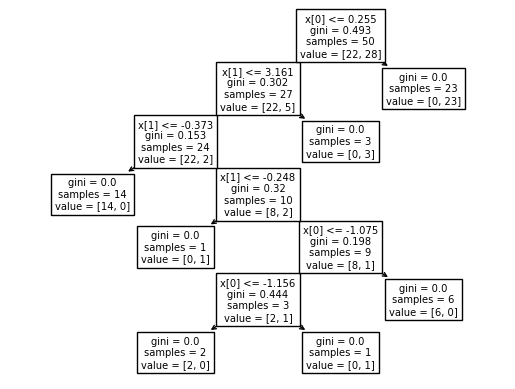

In [23]:
plot_tree(clf1)

[Text(0.4230769230769231, 0.9, 'x[0] <= -0.957\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.15384615384615385, 0.7, 'x[1] <= 0.336\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.23076923076923078, 0.5, 'x[0] <= -1.164\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6923076923076923, 0.7, 'x[0] <= -0.482\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.5384615384615384, 0.5, 'x[1] <= -0.516\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8461538461538461, 0.5, 'x[1] <= -1.513\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.7692307692307693, 0.3, 'x[1] <= -1.745\ngini = 0.198

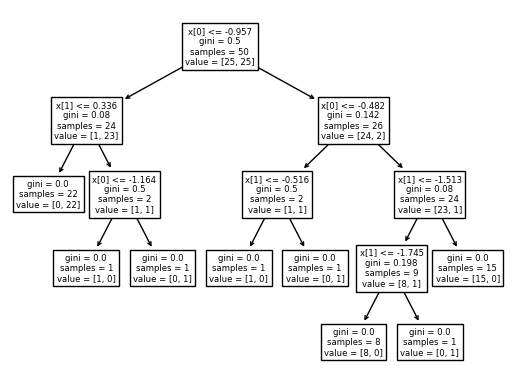

In [24]:
plot_tree(clf2)

[Text(0.4, 0.875, 'x[1] <= -0.408\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.6, 0.625, 'x[1] <= 0.226\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(0.4, 0.375, 'x[1] <= -0.35\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]')]

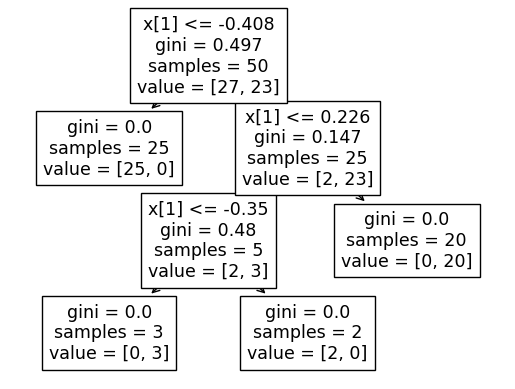

In [25]:
plot_tree(clf3)

In [26]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [27]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [28]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [29]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
13,2.079152,-0.237151,1.115110,0.544738,-0.731859,0
33,-1.056853,-0.805026,-0.122887,0.427419,-1.266259,0
56,1.211592,-3.253913,2.079290,-1.356380,-1.420473,0
16,-1.778379,0.324873,0.263238,-0.384087,0.870726,1
33,-1.056853,-0.805026,-0.122887,0.427419,-1.266259,0
25,-0.306904,-1.135576,-2.927235,-1.880334,0.959408,1
60,-2.582463,1.369227,1.778736,-0.411102,-0.481943,0
36,0.704232,-0.380832,2.782393,0.491100,-1.258196,0
10,0.624755,-0.757901,-1.641338,-2.290815,1.410435,1
45,0.145442,-1.119869,-1.226911,-0.932603,0.588409,1
